In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import matplotlib.tri as tri

### Determinants and Recursion


Write a function that computes the determinant of a matrix using recursion. Think about how each step of the determinant computation computes new determinants from smaller matrices. Also think about what should be the terminal case for the recursion.

Then write another function that determines whether a matrix is invertible using your determinant function.

In [6]:
def det(A):
    """
    Computes the determinant of a square matrix A using recursion.

    Parameters:
        A (numpy.ndarray): Input square matrix

    Returns:
        float: Determinant of the matrix A
    """
    # Base case: If the matrix is 1x1, return the single element as determinant
    if A.shape == (1, 1):
        return A[0, 0]

    # Recursive case: Compute determinant using cofactor expansion
    determinant = 0
    for j in range(A.shape[1]):
        # Compute the cofactor of A[0, j]
        cofactor = (-1) ** j * A[0, j] * det(np.delete(np.delete(A, 0, axis=0), j, axis=1))
        determinant += cofactor

    return determinant

def is_invertible(A):
    """
    Determines whether a square matrix A is invertible.

    Parameters:
        A (numpy.ndarray): Input square matrix

    Returns:
        bool: True if the matrix is invertible, False otherwise
    """
    return det(A) != 0

In [3]:
A = np.array([[1,2,2], [3,1,3], [1,3,1]], dtype = np.float64)
print(f"Numpy function: {np.linalg.det(A)}")
print(f"Our function: {det(A)}")
print(f"Is invertible: {is_invertible(A)}")

Numpy function: 8.000000000000002
Our function: 8.0
Is invertible: True


In [4]:
B = np.array([[1,2,2], [2,4,4], [1,3,1]], dtype = np.float64)
print(f"Numpy function: {np.linalg.det(B)}")
print(f"Our function: {det(B)}")
print(f"Is invertible: {is_invertible(B)}")

Numpy function: 0.0
Our function: 0.0
Is invertible: False


In [5]:
C = np.array([[3,0,0,2], [0,0,3,0], [0,0,2,2], [3,1,0,0]], dtype = np.float64)
print(f"Numpy function: {np.linalg.det(C)}")
print(f"Our function: {det(C)}")
print(f"Is invertible: {is_invertible(C)}")

Numpy function: 18.000000000000004
Our function: 18.0
Is invertible: True


### Cross Products and Surface Area

We will learn how to compute the surface area of a 3D shape made of triangles, which describes essentially all shapes you will see in computer graphics in practice.

In graphics, shapes are composed of vertices, edges, and faces. The vertices are the points that tell you where the shape is, the edges connect the points, and the faces are what we see when the image is rendered. The faces are just triangular faces that connect three vertices.

Below is an example where you will create a function that computes the surface area of a single face, then use that to compute the surface area of a complex object that is composed of many faces.

In [7]:
# area of a triangular face using the norm of the cross product
def face_area(u, v, w):
    """
    Computes the area of a triangular face defined by three vertices.

    Parameters:
        u (numpy.ndarray): Vector representing the first vertex.
        v (numpy.ndarray): Vector representing the second vertex.
        w (numpy.ndarray): Vector representing the third vertex.

    Returns:
        float: Area of the triangular face.
    """
    # Compute vectors representing the edges of the triangle
    edge1 = v - u
    edge2 = w - u

    # Compute the cross product of the edges
    cross_product = np.cross(edge1, edge2)

    # Compute the norm of the cross product and divide by 2 to get the area
    area = 0.5 * np.linalg.norm(cross_product)

    return area
# area of a surface given by a collection of triangular faces
def surface_area(A, print_flag=True):
    """
    Computes the surface area of a shape composed of triangular faces.

    Parameters:
        A (numpy.ndarray): Array where A[i,:,:] contains a 3x3 matrix of vertices for face i.
        print_flag (bool): Flag to print the area of each face.

    Returns:
        float: Surface area of the shape.
    """
    area = 0
    for i in range(A.shape[0]):
        # Add the area of each face to the overall area of the object
        area += face_area(A[i, 0], A[i, 1], A[i, 2])

        if print_flag:
            print(f"Area of face {i+1} is {face_area(A[i, 0], A[i, 1], A[i, 2])}")

    return area


In [8]:
# define the 3D figure

# vertices
u = np.array([-2,3,2])
v = np.array([-2,5,2])
w = np.array([-3,4,2])
t = np.array([-2,4,4])

# faces
A = np.array([[u,v,t], [v,w,t], [u,w,t], [u,v,w]])

surface_area(A)

Area of face 1 is 2.0
Area of face 2 is 1.5
Area of face 3 is 1.5
Area of face 4 is 1.0


6.0

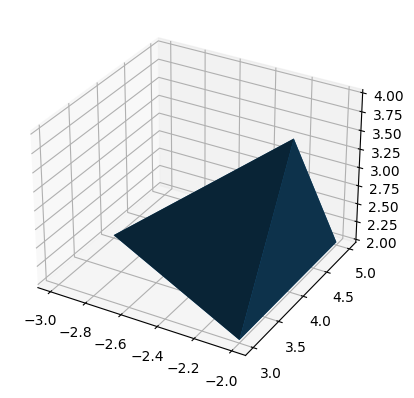

In [9]:
##### visualize the surface #####

vertices = np.array([u,v,w,t])
# x,y,z coordinates of all vertices
x = vertices[:,0]
y = vertices[:,1]
z = vertices[:,2]

# create triangle faces
faces = tri.Triangulation(x,y, [[0,1,3],[1,2,3],[0,2,3], [0,1,2]])
fig, ax = plt.subplots(subplot_kw =dict(projection="3d"))
ax.plot_trisurf(faces, z)
plt.show()